In [163]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [164]:
data = pd.read_csv('final_data_in_ML.csv',parse_dates=['Standardized_Date'])

In [165]:
data=data[['Standardized_Date','RAW WATER FLOW IN ML',
       'CLEAR WATER SUMP LEVEL IN Meter', 'CLEAR WATER PUMPING FLOW ML',
       'TREATED WATER PRODUCTION IN ML', 'remarks category']]
data

,Standardized_Date,RAW WATER FLOW IN ML,CLEAR WATER SUMP LEVEL IN Meter,CLEAR WATER PUMPING FLOW ML,TREATED WATER PRODUCTION IN ML,remarks category
0,2021-12-01,3.52301,2.10,2.70209,3.40957,No remarks
1,2021-12-01,3.51043,2.84,2.77743,3.39739,No remarks
2,2021-12-01,3.49087,3.12,2.79467,3.37846,No remarks
3,2021-12-01,3.50543,3.44,2.79543,3.39256,No remarks
4,2021-12-01,3.51556,3.72,2.79826,3.40236,No remarks
...,...,...,...,...,...,...
24043,2024-08-28,3.13486,3.46,2.87175,3.03392,No remarks
24044,2024-08-28,3.17401,3.63,2.85830,3.07181,No remarks
24045,2024-08-28,3.13113,3.64,2.87098,3.03031,No remarks
24046,2024-08-28,3.16261,3.49,2.89001,3.06077,No remarks


In [166]:
data['remarks category'].value_counts()

remarks category
No remarks                          23385
Power Failure at Intake               118
intake cleaning                        98
maintanance                            72
pipe line broken at thaliparamba       72
Power Failure at intake and WTP        54
WTP cleaning                           49
distribution line maintanance          35
complaint at WTP                       33
Power Failure at WTP                   25
intake sump level low                  22
maintanance at intake                  22
under voltage                          16
maintanance at Thaliparamba            15
intake pumping stopped                 13
channel cieaning                       10
voltage fluctation at intake            4
inlet chamber cleaning                  4
energy auditing                         1
Name: count, dtype: int64

# Encoding

In [167]:
data.select_dtypes(include=object).nunique()

remarks category    19
dtype: int64

In [168]:
from sklearn.preprocessing import LabelEncoder

label_en = LabelEncoder()

a = ['remarks category']
for i in a:
    data[i] = label_en.fit_transform(data[i])
    # Display the mapping of labels to original values
    label_mapping = dict(zip(label_en.classes_, label_en.transform(label_en.classes_)))
    print(f"Label mapping for column '{i}':")
    print(label_mapping)


Label mapping for column 'remarks category':
{'No remarks': 0, 'Power Failure at Intake': 1, 'Power Failure at WTP': 2, 'Power Failure at intake and WTP': 3, 'WTP cleaning': 4, 'channel cieaning': 5, 'complaint at WTP': 6, 'distribution line maintanance': 7, 'energy auditing': 8, 'inlet chamber cleaning': 9, 'intake cleaning': 10, 'intake pumping stopped': 11, 'intake sump level low': 12, 'maintanance': 13, 'maintanance at Thaliparamba': 14, 'maintanance at intake': 15, 'pipe line broken at thaliparamba': 16, 'under voltage': 17, 'voltage fluctation at intake': 18}


In [169]:
data.set_index('Standardized_Date', inplace=True)
df=data[['CLEAR WATER PUMPING FLOW ML',
        'remarks category']]

array([<Axes: xlabel='Standardized_Date'>,
       <Axes: xlabel='Standardized_Date'>], dtype=object)

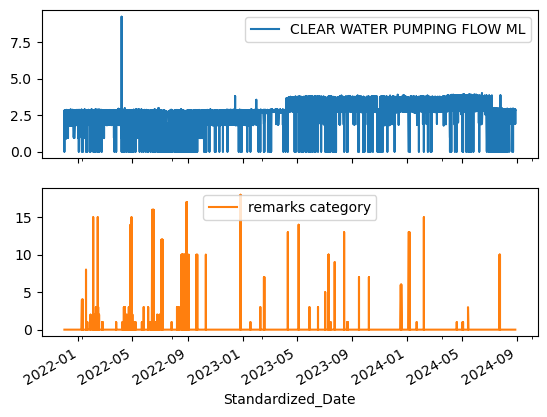

In [170]:
df.plot(subplots=True)

<Axes: ylabel='Density'>

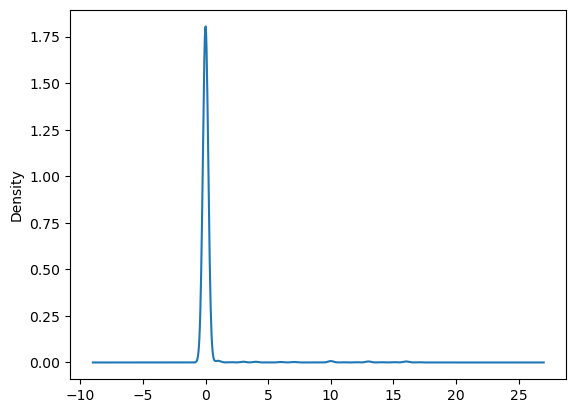

In [171]:
df['remarks category'].plot(kind='density')

<Axes: >

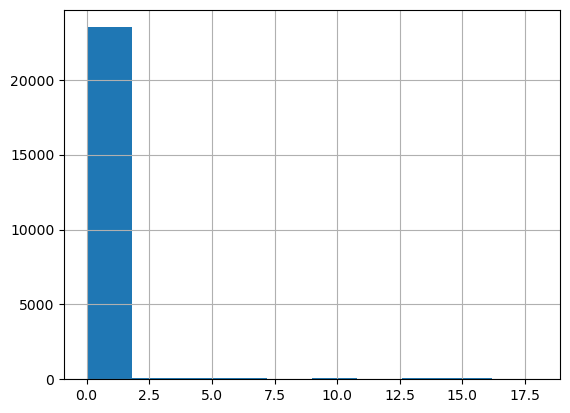

In [172]:
df['remarks category'].hist()

# Feature Reduction

In [173]:
data.corr()

,RAW WATER FLOW IN ML,CLEAR WATER SUMP LEVEL IN Meter,CLEAR WATER PUMPING FLOW ML,TREATED WATER PRODUCTION IN ML,remarks category
RAW WATER FLOW IN ML,1.000000,0.221732,0.797398,1.000000,-0.476066
CLEAR WATER SUMP LEVEL IN Meter,0.221732,1.000000,0.187376,0.221728,-0.227724
CLEAR WATER PUMPING FLOW ML,0.797398,0.187376,1.000000,0.797393,-0.433950
TREATED WATER PRODUCTION IN ML,1.000000,0.221728,0.797393,1.000000,-0.476066
remarks category,-0.476066,-0.227724,-0.433950,-0.476066,1.000000


<Axes: >

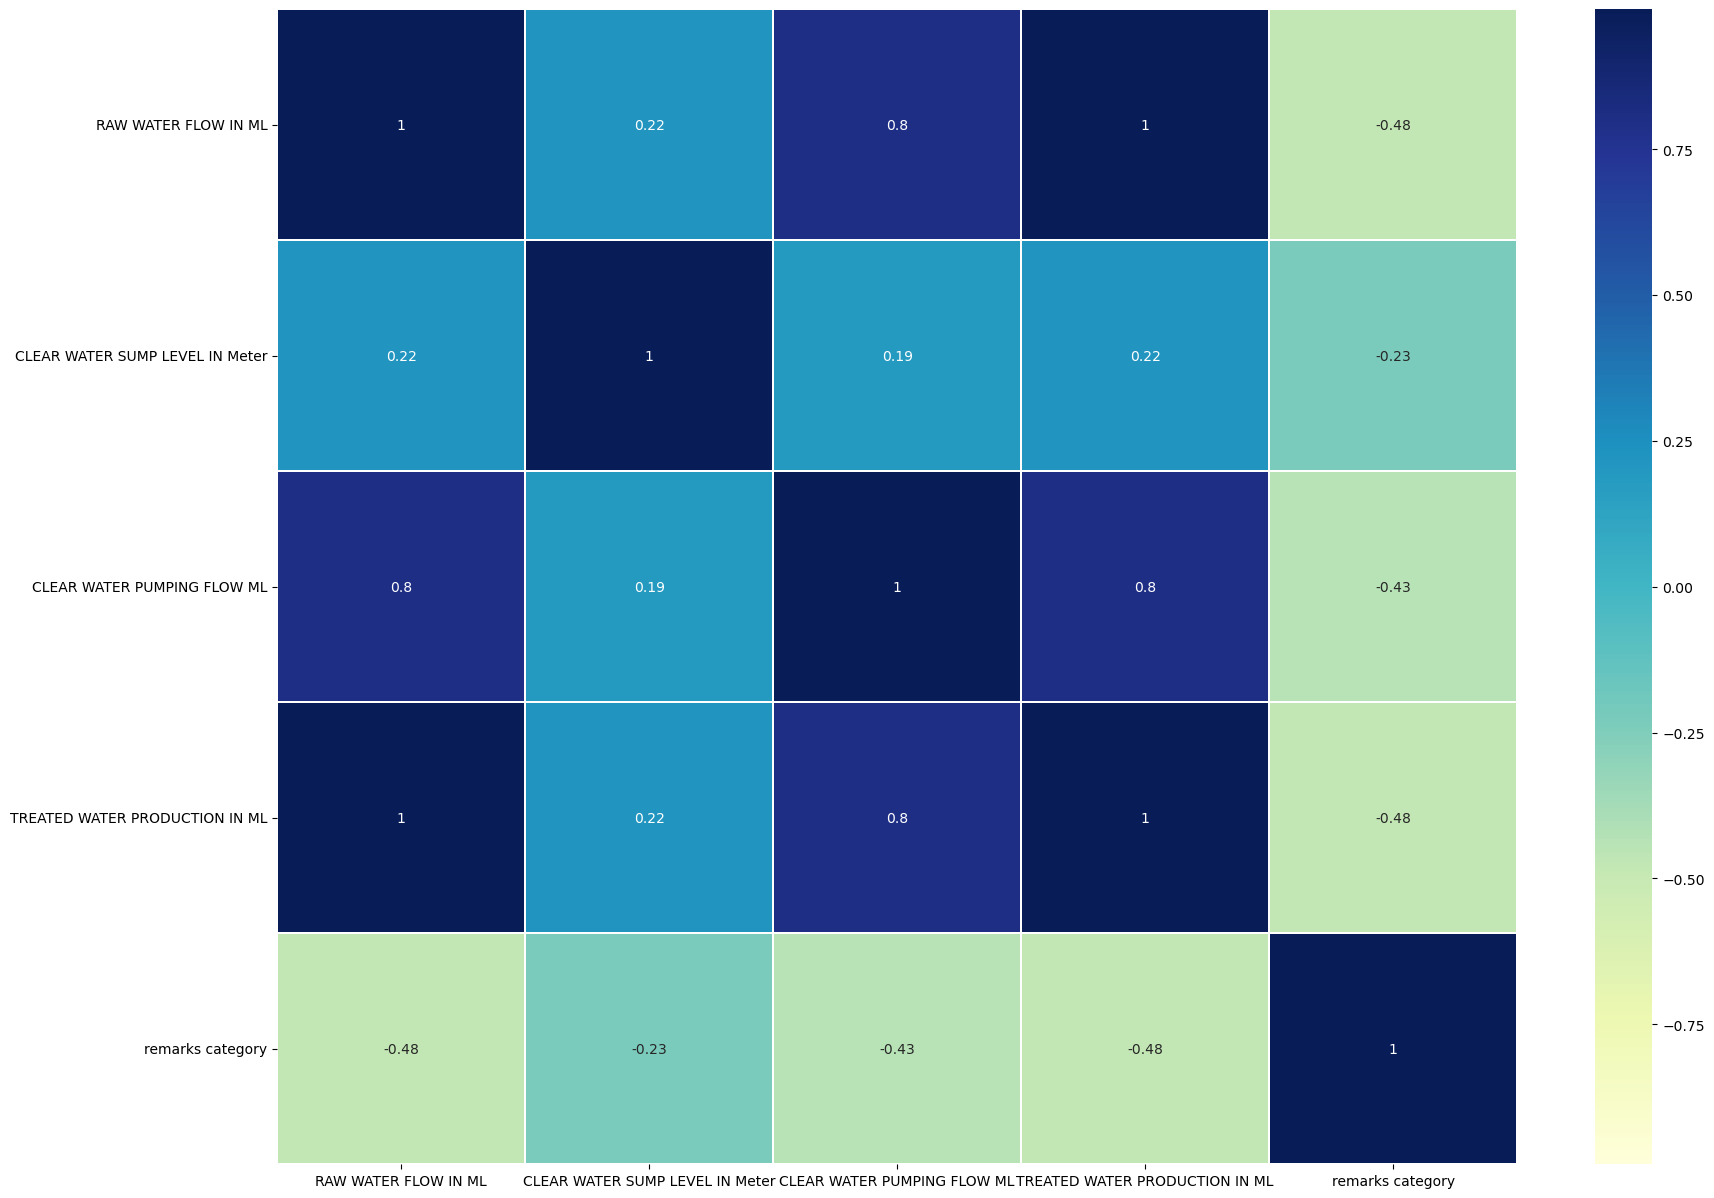

In [13]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),vmin = -0.99,vmax = 0.99,cmap='YlGnBu',linewidths =0.1,annot=True)

In [14]:
data=data.drop(['TREATED WATER PRODUCTION IN ML'],axis=1)

# Feature Scaling

In [15]:
y=data['CLEAR WATER PUMPING FLOW ML']
X=data.drop(['CLEAR WATER PUMPING FLOW ML'],axis=1)

In [16]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range =(0,1))
X = min_max.fit_transform(X)
X=pd.DataFrame(X)
X.describe()

,0,1,2
count,24048.000000,24048.000000,24048.000000
mean,0.740915,0.709381,0.012526
std,0.214780,0.152983,0.089749
min,0.000000,0.000000,0.000000
25%,0.625614,0.611650,0.000000
50%,0.842563,0.716019,0.000000
75%,0.877325,0.822816,0.000000
max,1.000000,1.000000,1.000000


# Modelling

# LinearRegression

In [17]:
#splitting the dataset into train and test 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
y_pred[-10:]

Mean Squared Error: 2.036883683951761
Root Mean Squared Error: 1.4271943399382443
R-squared: 0.29412828235301147


array([1.78807862, 2.11095259, 2.52515507, 0.04366636, 2.57050061,
       1.21543319, 1.22316488, 0.91642916, 0.95542017, 2.96616661])

In [19]:
#Since we have continuous values in our target variable,and classification models won't perform the continuous variables, so splitting the target column values into 0,1,2 and 3 and 4
y[(y>0)&(y<=2)]=0
y[(y>2)&(y<=4)]=1
y[(y>4)&(y<=6)]=2
y[(y>6)&(y<=8)]=3
y[(y>8)&(y<=10)]=4
#Checking the imbalance of the dataset
y.value_counts(normalize=True).to_frame()


,proportion
CLEAR WATER PUMPING FLOW ML,
1.0,0.807136
0.0,0.192740
4.0,0.000125


In [20]:
#Here we can see that the data is highly imbalanced. 
#So we have to make the dataset balanced
#Here we will go for oversampling as in undersampling data drop will be there .
#Oversampling will create new examples in minority class and can keep the data in dataset

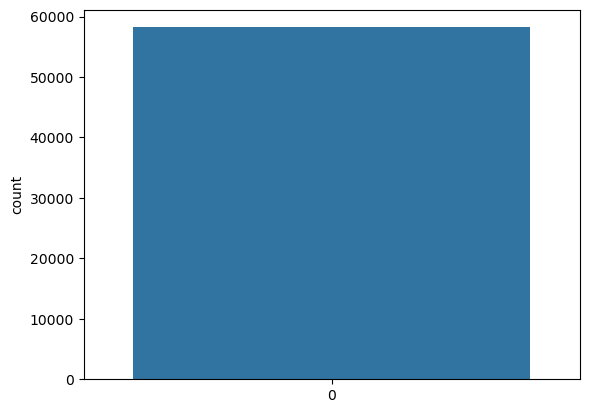

In [21]:
from imblearn.over_sampling import SMOTE
smt=SMOTE(k_neighbors=2)
X_os, y_os = smt.fit_resample(X, y)
sns.countplot(y_os)
plt.show()

In [22]:
y_os.value_counts(normalize=True).to_frame()

,proportion
CLEAR WATER PUMPING FLOW ML,
1.0,0.333333
0.0,0.333333
4.0,0.333333


In [23]:
#splitting the dataset into train and test 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_os,y_os,random_state=42,test_size=0.25)

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import  classification_report
logit_reg=LogisticRegression()
model=logit_reg.fit(X_train,y_train)
predictions1=model.predict(X_test)

In [25]:
print("Results from logistic regression are as below")
log_result = classification_report(predictions1,y_test,output_dict=True)
log_result = pd.DataFrame(log_result).transpose()
log_result.style.background_gradient(cmap="BuPu")

Results from logistic regression are as below


,precision,recall,f1-score,support
0.0,0.705882,0.832085,0.763806,4139.000000
1.0,0.848391,0.923232,0.884231,4455.000000
4.0,1.000000,0.810027,0.895044,5964.000000
accuracy,0.850941,0.850941,0.850941,0.850941
macro avg,0.851424,0.855115,0.847694,14558.000000
weighted avg,0.869984,0.850941,0.854423,14558.000000


# Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictions2=dt_model.predict(X_test)

In [27]:
print("Results from Decision Tree are as below")
DT_result = classification_report(predictions2,y_test,output_dict=True)
DT_result = pd.DataFrame(DT_result).transpose()
DT_result.style.background_gradient(cmap="BuPu")

Results from Decision Tree are as below


,precision,recall,f1-score,support
0.0,0.883583,0.881956,0.882769,4888.000000
1.0,0.880982,0.882620,0.881800,4839.000000
4.0,1.000000,1.000000,1.000000,4831.000000
accuracy,0.921349,0.921349,0.921349,0.921349
macro avg,0.921522,0.921525,0.921523,14558.000000
weighted avg,0.921351,0.921349,0.921349,14558.000000


# Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predictions5 = rf.predict(X_test)
predictions5

array([1., 1., 1., ..., 0., 1., 0.])

In [29]:
print("Results from Random Forest are as below")
RF_result = classification_report(predictions5,y_test,output_dict=True)
RF_result = pd.DataFrame(RF_result).transpose()
RF_result.style.background_gradient(cmap="BuPu")

Results from Random Forest are as below


,precision,recall,f1-score,support
0.0,0.928469,0.900955,0.914505,5028.000000
1.0,0.897277,0.925729,0.911281,4699.000000
4.0,1.000000,1.000000,1.000000,4831.000000
accuracy,0.941819,0.941819,0.941819,0.941819
macro avg,0.941915,0.942228,0.941929,14558.000000
weighted avg,0.942138,0.941819,0.941835,14558.000000


# Gradient Boosting Classifier

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
model = GB.fit(X_train,y_train)
predictions6 = model.predict(X_test)
print("Results from Gradient Boosting are as below")
GB_result = classification_report(predictions6,y_test,output_dict=True)
GB_result = pd.DataFrame(GB_result).transpose()
GB_result.style.background_gradient(cmap="BuPu")

Results from Gradient Boosting are as below


,precision,recall,f1-score,support
0.0,0.952039,0.855748,0.901329,5428.000000
1.0,0.838490,0.945569,0.888816,4299.000000
4.0,1.000000,1.000000,1.000000,4831.000000
accuracy,0.930142,0.930142,0.930142,0.930142
macro avg,0.930176,0.933772,0.930048,14558.000000
weighted avg,0.934424,0.930142,0.930377,14558.000000


# Ada Boost Classifier

In [31]:
from sklearn.ensemble import AdaBoostClassifier
AD=AdaBoostClassifier()
AD_model= AD.fit(X_train , y_train)
predictions7=AD_model.predict(X_test)
print("Results from ADA booster are as below")
AD_result = classification_report(predictions7,y_test,output_dict=True)
AD_result = pd.DataFrame(AD_result).transpose()
AD_result.style.background_gradient(cmap="BuPu")

Results from ADA booster are as below


,precision,recall,f1-score,support
0.0,0.435130,0.986524,0.603897,2152.000000
1.0,0.994018,0.636256,0.775882,7574.000000
4.0,1.000000,0.999793,0.999897,4832.000000
accuracy,0.808696,0.808696,0.808696,0.808696
macro avg,0.809716,0.874191,0.793225,14558.000000
weighted avg,0.913387,0.808696,0.824812,14558.000000


# GaussianNB

In [32]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GNB_model=GNB.fit(X_train , y_train)
predictions8=GNB_model.predict(X_test)
print("Results from Gaussian Naive bayer are as below")
GNB_result = classification_report(predictions8,y_test,output_dict=True)
GNB_result = pd.DataFrame(GNB_result).transpose()
GNB_result.style.background_gradient(cmap="BuPu")

Results from Gaussian Naive bayer are as below


,precision,recall,f1-score,support
0.0,0.409305,0.987148,0.578673,2023.000000
1.0,0.994637,0.625990,0.768385,7703.000000
4.0,1.000000,0.999793,0.999897,4832.000000
accuracy,0.800247,0.800247,0.800247,0.800247
macro avg,0.801314,0.870977,0.782318,14558.000000
weighted avg,0.915079,0.800247,0.818864,14558.000000


# BaggingClassifier

In [33]:
from sklearn.ensemble import BaggingClassifier
BC=BaggingClassifier()
BC_model=BC.fit(X_train , y_train)
predictions9=BC_model.predict(X_test)
print("Results from Bagging classifier are as below")
BC_result = classification_report(predictions9,y_test,output_dict=True)
BC_result = pd.DataFrame(BC_result).transpose()
BC_result.style.background_gradient(cmap="BuPu")

Results from Bagging classifier are as below


,precision,recall,f1-score,support
0.0,0.930928,0.886244,0.908037,5125.000000
1.0,0.879744,0.926771,0.902646,4602.000000
4.0,1.000000,1.000000,1.000000,4831.000000
accuracy,0.936805,0.936805,0.936805,0.936805
macro avg,0.936891,0.937672,0.936894,14558.000000
weighted avg,0.937669,0.936805,0.936850,14558.000000
